In [50]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product
import copy

In [2]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)

# Add edges (implicitly adds nodes if they don't exist)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 1)  # Creates a cycle

# Print the nodes and edges
print("Nodes:", G.nodes())
print("Edges:", G.edges())

# Accessing neighbors (successors in the case of DiGraph)
print("Successors of 1:", list(G.successors(1)))
print("Predecessors of 3:", list(G.predecessors(3)))


Nodes: [1, 2, 3]
Edges: [(1, 2), (2, 3), (3, 1)]
Successors of 1: [2]
Predecessors of 3: [2]


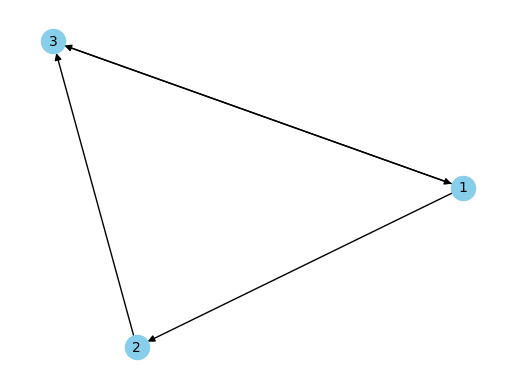

In [19]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges as before
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 1)



# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Nodes
nx.draw_networkx_nodes(G, pos,node_color='skyblue', node_size=300)

# Edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrowstyle='->', arrowsize=20)

# Labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.axis('off')  # Turn off the axis
plt.show()  # Display the graph



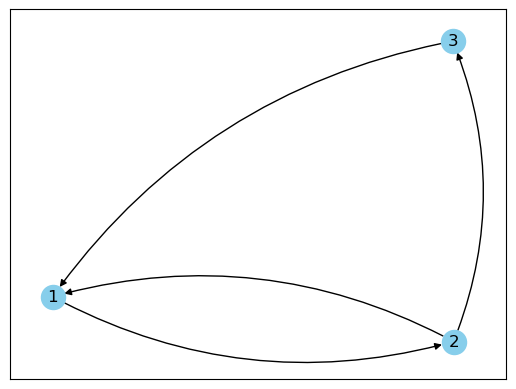

In [24]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 1)
G.add_edge(2, 1)  # Adding a reverse edge for demonstration

# Generate positions for each node using the spring layout
pos = nx.spring_layout(G)

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=300)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=12)

# Draw the edges with curvature to avoid overlap
nx.draw_networkx_edges(G, pos, connectionstyle='arc3,rad=0.2', arrows=True)

# Optional: Draw the edges with different curvature for bidirectional edges
# For example, to make the edge from 2 to 1 curve differently:
#nx.draw_networkx_edges(G, pos, edgelist=[(2, 1)], connectionstyle='arc3,rad=-0.2', arrows=True, edge_color='red')

# Display the plot
plt.show()


# Cycle finding

In [27]:
# Create a directed graph with a cycle
G = nx.DiGraph([(1, 2), (2, 3), (3, 1), (3, 4)])

try:
    cycle = nx.find_cycle(G)
    print("A cycle exists:", cycle)
except nx.exception.NetworkXNoCycle:
    print("No cycle found.")



A cycle exists: [(1, 2), (2, 3), (3, 1)]


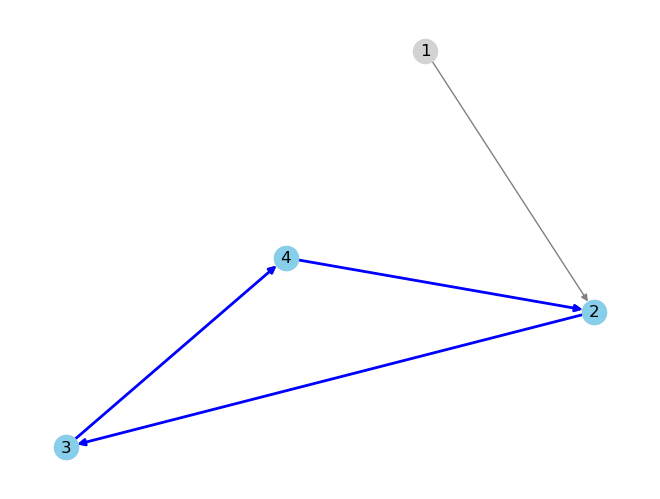

In [29]:
# Create a directed graph and add edges
G = nx.DiGraph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 2)])  # This creates a cycle

# Find a cycle
cycle = nx.find_cycle(G, orientation='original')

# Generate positions for all nodes
pos = nx.spring_layout(G)

# Draw the entire graph with a generic style
nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightgrey', edge_color='grey', arrows=True)

# Extract the nodes and edges in the cycle
cycle_edges = [(u, v) for u, v, d in cycle]
cycle_nodes = set([u for u, v in cycle_edges] + [v for u, v in cycle_edges])

# Draw just the nodes in the cycle
nx.draw_networkx_nodes(G, pos, nodelist=cycle_nodes, node_color='skyblue', node_size=300)

# Draw just the edges in the cycle
nx.draw_networkx_edges(G, pos, edgelist=cycle_edges, edge_color='blue', width=2, arrows=True)

# If the orientation includes reversed edges, you can draw them differently
for u, v, direction in cycle:
    if direction == 'reverse':
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color='red', width=2, arrows=True, style='dashed')

plt.show()


# TTC (Getting Ready)

In [33]:
pref= {1:[2,3],2:[1,3],3:[1,2]}

nodes=set(k for k  in pref.keys())

In [36]:
# Create an empty graph
G = nx.Graph()  # or nx.DiGraph() for a directed graph

# Add nodes to the graph
G.add_nodes_from(nodes)

In [37]:
#Top Choicelar ile graph yaratma
gr=[]
for k in pref.keys():
    gr.append((k,pref[k][0]))
    
print(gr)    

[(1, 2), (2, 1), (3, 1)]


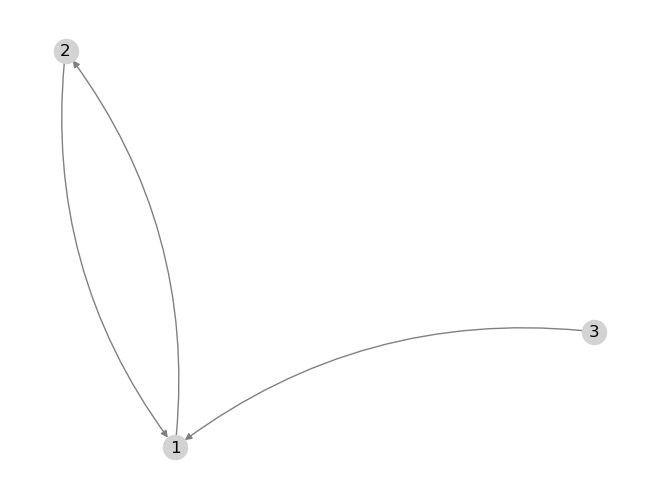

In [40]:
G = nx.DiGraph()
G.add_edges_from(gr)  # This creates a cycle


# Generate positions for all nodes
pos = nx.spring_layout(G)

# Draw the entire graph with a generic style
nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightgrey', 
        edge_color='grey', arrows=True, connectionstyle='arc3,rad=0.2')

plt.show()

In [43]:
# To create caretesian tuples from the preferences

# Given dictionary
d = {1: [2, 3], 2: [1, 3], 3: [1, 2]}

# Create a list of tuples as the cartesian products
l = [tuple for key, values in d.items() for tuple in product([key], values)]

print(l)


[(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2)]


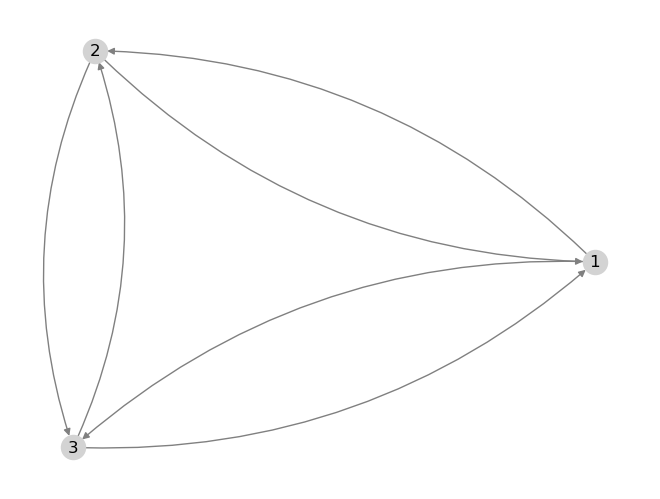

In [45]:
# General graph with all acceptables

G = nx.DiGraph()
G.add_edges_from(l)  # This creates a cycle


# Generate positions for all nodes
pos = nx.spring_layout(G)

# Draw the entire graph with a generic style
nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightgrey', 
        edge_color='grey', arrows=True, connectionstyle='arc3,rad=0.2')

plt.show()

# Removing Nodes

In [48]:
# Create a graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4)])

# Remove node 1
G.remove_node(1)

# Display the remaining graph
print("Nodes:", list(G.nodes))
print("Edges:", list(G.edges))

Nodes: [2, 3, 4]
Edges: [(2, 4), (3, 4)]


In [57]:
# Create a graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (4, 5)])

# Remove nodes 2 and 3
G.remove_nodes_from({2, 3})

# Display the remaining graph
print("Nodes:", list(G.nodes))
print("Edges:", list(G.edges))

Nodes: [1, 4, 5]
Edges: [(4, 5)]


In [71]:
#Removing top cycle from the graph
pref2=copy.deepcopy(pref)
top_edges=[]
for k in pref2.keys():
    top_edges.append((k,pref[k][0]))
    
#Create top choice graph
G = nx.DiGraph()
G.add_edges_from(top_edges)

# Find a cycle in top graph
top_cycle = nx.find_cycle(G, orientation='original')

# Extract the nodes and edges in the cycle
top_cycle_edges = [(u, v) for u, v, d in top_cycle]
top_cycle_nodes = set([u for u, v in top_cycle_edges] + [v for u, v in top_cycle_edges])

# Remove the top cycle nodes from graph
G.remove_nodes_from(top_cycle_nodes)


In [70]:
# A cycle include (1,2) and (2,1) to get rid of one of them fakat pu sadece pairwise icin gecerli

# Initial list of tuples
tuples = [(1, 2), (2, 1), (3, 4), (4, 5), (5, 4)]

# Use a set to track seen tuples and their symmetrical versions
seen = set()
result = []

for tup in tuples:
    # Create a symmetrical version of the current tuple
    symmetrical = (tup[1], tup[0])
    
    # Check if either the tuple or its symmetrical version has been seen
    if tup not in seen and symmetrical not in seen:
        result.append(tup)  # Keep the tuple if neither has been seen
        seen.add(tup)  # Mark the tuple as seen

# The result contains tuples with removed symmetrical duplicates
print(result)


[(1, 2), (3, 4), (4, 5)]
